# Coding project - Tumour segmentation

The image below is a slice of a brain MRI with a large tumour in it. The goal of this project is to create an algorithm to automatically segment the tumour.

Given that the resolution of the image is of 0.115 cm/px in both axis, estimate the area of the tumour (in cm²). 

uint8


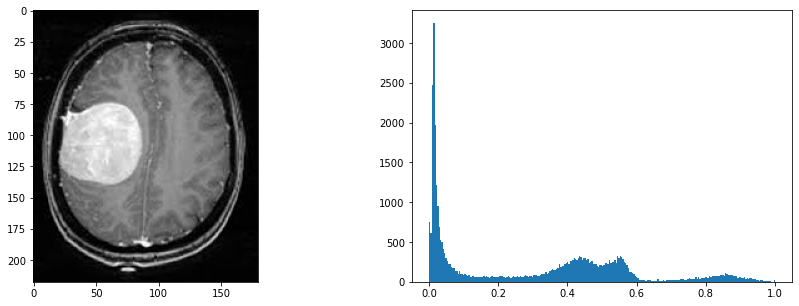

In [1]:
from skimage.color import rgb2gray
from skimage.io import imread,imshow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

im = imread('mri_brain.jpg')
print(im.dtype)
im = rgb2gray(im)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(im, cmap = cm.gray)
plt.subplot(1,2,2)
plt.hist(im.flatten(), bins=256)
plt.show()

In [4]:
from skimage.morphology import disk, opening, closing
from skimage.filters import threshold_otsu
import skimage.filters.rank as skr

def surface_with_hist_seg (im, scale):
    """Renvoie une estimation de la surface d'une tumeur à partir d'une
    image. La segmentation est réalisée sur des niveaux des gris et des 
    thresholds"""
    if (len(im.shape)>2):
        ims = rgb2gray(im)
    else :
        ims= im.copy()
    
    #Suppression du bruit dans l'arrière plan, seuille min de signal utile
    mask_bf = ims > threshold_otsu(ims)
    
    #Segmentation avec threshold ostu
    mask = ims < threshold_otsu(ims[mask_bf])
    ims[mask] = 0
    
    #Reconstruction et supression des zones mineures superflues
    ims = closing(ims, disk(5))
    ims = opening(ims, disk(5))
    
    #calcul du noombre de pixel de la surface
    nbr = (ims!=0).sum()
    surface = nbr*(scale**2)
    
    return surface, ims

<Figure size 1080x360 with 0 Axes>

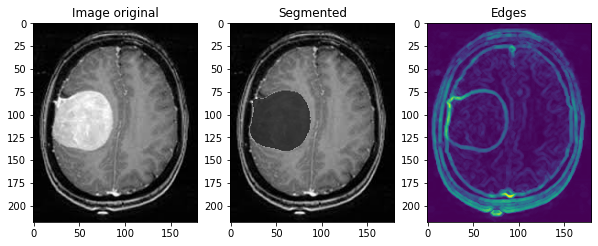

La surface est de 46.089125 cm²


In [5]:
tum1 = imread('mri_brain.jpg')
tum2 = tum1.copy()
surface1, im1 = surface_with_hist_seg(tum1, 0.115)
gradient1 = skr.gradient(skr.median(rgb2gray(tum1),disk(2)), disk(2))
mask = (im1 > 0)
tum1[mask] = tum1[mask]*0.25

plt.figure(figsize =(15,5))
plt.imshow
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(tum2)
plt.title('Image original')
plt.subplot(1,3,2)
plt.imshow(tum1)
plt.title('Segmented')
plt.subplot(1,3,3)
plt.imshow(gradient1)
plt.title('Edges')
plt.show()
print('La surface est de', surface1,'cm²',sep=' ')

Donne une estimation de la surface d'une tumeur sur MRI. L'utilisation de la segmentation basée sur histogramme avec des thresholds d'Ostu à tendance à sursegmenter. C'est pourquoi, il y a une opération de 'closing' qui précède une opening. Cette technique marche bien ici car la tumeur est très contrastée par rapport au reste du cerveau et ceux-ci sont bien en contraste avec le fond, ce qui se traduit par trois zones distinctes sur
l'histogramme. Après des tests sur d'autres images, cette technique ne s'avère efficace que sur certains types d'image, celle ou on a ces trois zones bien distinctes de l'histogramme. Il existe plusieurs piste d'amélioration possible comme par exemple : ajouter pré-traiment de l'image, faire une segmentation basé sur les textures ou les bords.